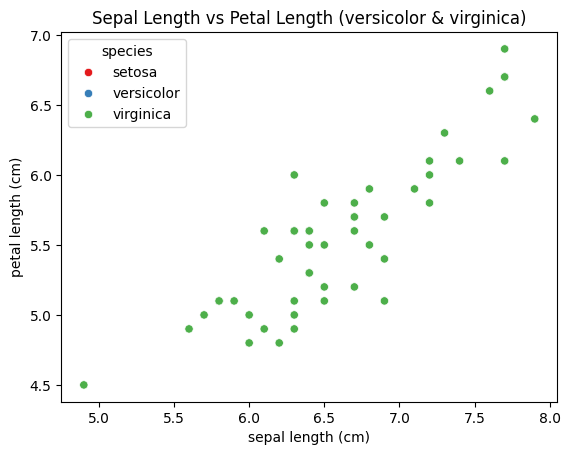

In [1]:
#[Problem 1] Select features and categories for practice
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
iris=load_iris();
df=pd.DataFrame(iris.data,columns=iris.feature_names)

df['species']=pd.Categorical.from_codes(iris.target,iris.target_names)
df_filtred=df[df['species'].isin(['virgicolor','virginica'])]
#df_selected=df_filtred[['sepal length (cm)','petal length (cm)','	species']]
df_selected = df_filtred[['sepal length (cm)', 'petal length (cm)', 'species']]

df_selected

sns.scatterplot(data=df_selected,x='sepal length (cm)',y='petal length (cm)',hue='species',palette='Set1')
plt.title('Sepal Length vs Petal Length (versicolor & virginica)')
plt.show()

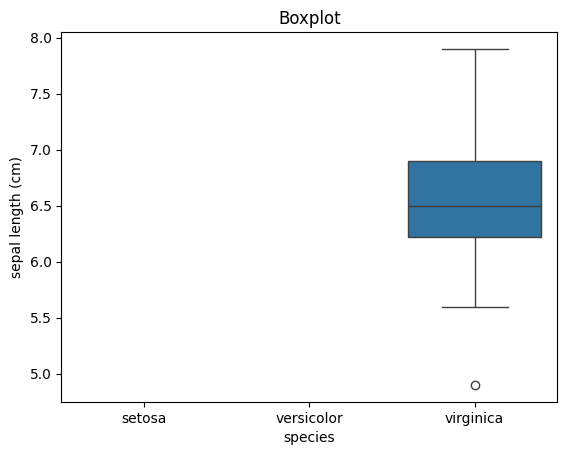

In [ ]:
#[Problem 2] Data analysis
sns.boxplot(data=df_selected,x='species',y='sepal length (cm)')
plt.title('Boxplot')
plt.show()

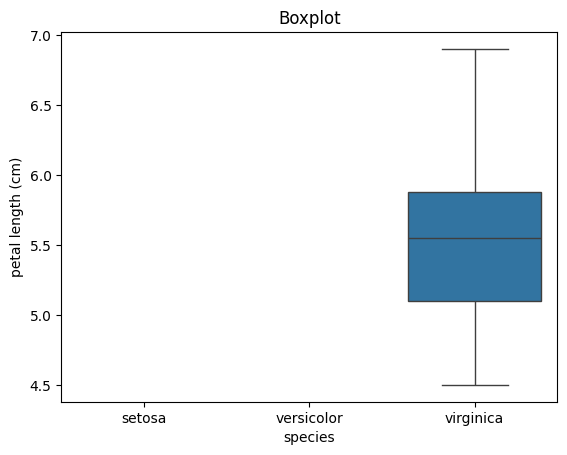

In [ ]:
sns.boxplot(data=df_selected,x='species',y='petal length (cm)')
plt.title('Boxplot')
plt.show()


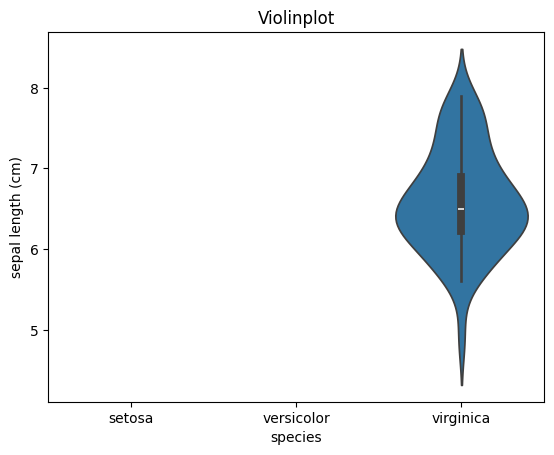

In [ ]:

sns.violinplot(data=df_selected,x='species',y='sepal length (cm)')
plt.title('Violinplot')
plt.show()

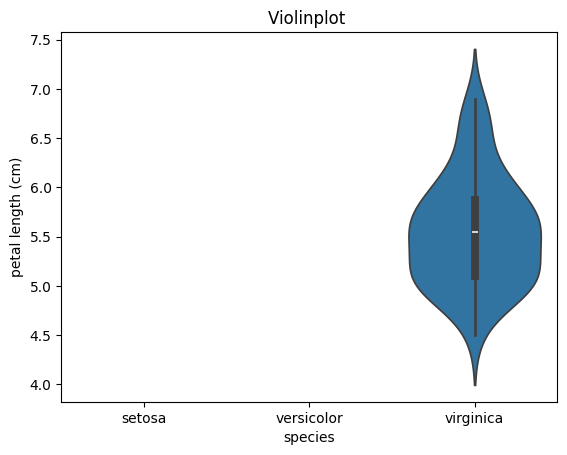

In [ ]:
sns.violinplot(data=df_selected,x='species',y='petal length (cm)')
plt.title('Violinplot ')
plt.show();

In [3]:
#[Problem 3] Division of preprocessing/training data and verification data
from sklearn.model_selection import train_test_split
features_names = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
df['target']=iris.target

x=df[features_names].values
y=df['target'].values

x_train,x_valid,y_train,y_valid=train_test_split(x,y,test_size=0.25,random_state=0)
print(x_train.shape)
print(x_valid.shape)
print(y_train.shape)
print(y_valid.shape)


(112, 4)
(38, 4)
(112,)
(38,)


In [4]:
#[Problem 4] Pretreatment/Standardization
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x_train_s=scale.fit_transform(x_train)
x_val_s=scale.fit_transform(x_valid)
print(x_train_s.shape)



(112, 4)


In [5]:
#[Problem 5] Learning and estimation
from sklearn.neighbors import KNeighborsClassifier
neigh1=KNeighborsClassifier(n_neighbors=1)
neigh2=KNeighborsClassifier(n_neighbors=3)
neigh3=KNeighborsClassifier(n_neighbors=5)

kn1=neigh1.fit(x_train,y_train)
kn2=neigh2.fit(x_train,y_train)
kn3=neigh3.fit(x_train,y_train)

print(kn1.predict(x_val_s))
print(kn2.predict(x_val_s))
print(kn3.predict(x_val_s))


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0]


In [15]:
#[Problem 6] Evaluation
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score ,confusion_matrix
x_pre=kn1.predict(x_val_s)
print(f'Accuracy:{accuracy_score(y_valid,x_pre)}')
print(f'Precision:{precision_score(y_valid,x_pre ,average="macro")}')
print(f'Recall:',recall_score(y_valid,x_pre,average="macro"))
print(f'F1:{f1_score(y_valid,x_pre,average="macro")}')
print("Confusion matrix:\n", confusion_matrix(y_valid, x_pre))


Accuracy:0.34210526315789475
Precision:0.11403508771929825
Recall: 0.3333333333333333
F1:0.1699346405228758
Confusion matrix:
 [[13  0  0]
 [16  0  0]
 [ 9  0  0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#Accuracy -
How many predictions were correct overall.
It checks if the model is right overall.
#Precision
How often the model is right when it says "yes".
#Recall
How well the model finds all the actual "yes" cases.
#F1
A balanced score between precision and recall.
#Confusion Matrix
The confusion matrix is a simple table that helps you see how well your model is performing




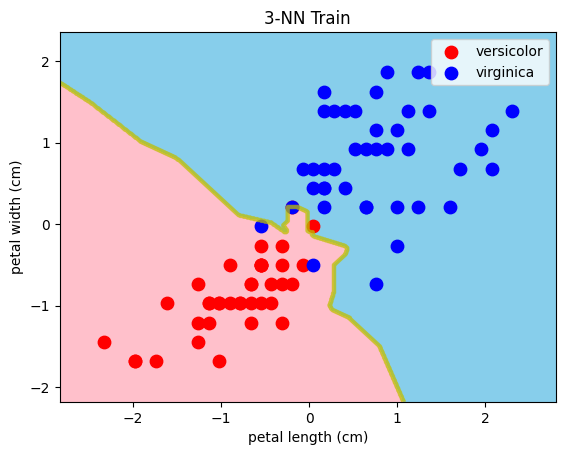

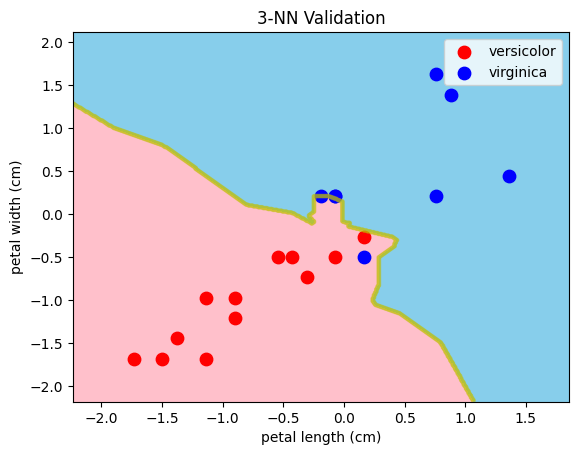

In [21]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

# Load iris dataset
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Select 2 features and filter for binary classification (class 1 and 2)
features_2d = ['petal length (cm)', 'petal width (cm)']
x_2d = df[features_2d].values
y = df['target'].values

# Filter only class 1 and 2
binary_filter = (y == 1) | (y == 2)
x_2d_binary = x_2d[binary_filter]
y_binary = y[binary_filter]

x_train, x_valid, y_train, y_valid = train_test_split(x_2d_binary, y_binary, test_size=0.2, random_state=42)

scaler = StandardScaler()
x_train_s = scaler.fit_transform(x_train)
x_valid_s = scaler.transform(x_valid)

kn3 = KNeighborsClassifier(n_neighbors=3)
kn3.fit(x_train_s, y_train)

# Decision region function
def decision_region(
    X,
    y,
    model,
    step=0.01,
    title="decision region",
    xlabel="xlabel",
    ylabel="ylabel",
    target_names=["versicolor", "virginica"],
):
    scatter_color = ["red", "blue"]
    contourf_color = ["pink", "skyblue"]
    n_class = 2

    mesh_f0, mesh_f1 = np.meshgrid(
        np.arange(np.min(X[:, 0]) - 0.5, np.max(X[:, 0]) + 0.5, step),
        np.arange(np.min(X[:, 1]) - 0.5, np.max(X[:, 1]) + 0.5, step),
    )
    mesh = np.c_[np.ravel(mesh_f0), np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(
        mesh_f0, mesh_f1, y_pred, n_class - 1, cmap=ListedColormap(contourf_color)
    )
    plt.contour(
        mesh_f0, mesh_f1, y_pred, n_class - 1, colors="y", linewidths=3, alpha=0.5
    )
    for i, target in enumerate(np.unique(y)):
        plt.scatter(
            X[y == target][:, 0],
            X[y == target][:, 1],
            s=80,
            color=scatter_color[i],
            label=target_names[i],
            marker="o",
        )
    patches = [
        mpatches.Patch(color=scatter_color[i], label=target_names[i])
        for i in range(n_class)
    ]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

# Show decision region
decision_region(x_train_s, y_train, kn3, title="3-NN Train", xlabel=features_2d[0], ylabel=features_2d[1])
decision_region(x_valid_s, y_valid, kn3, title="3-NN Validation", xlabel=features_2d[0], ylabel=features_2d[1])


In [ ]:
#[Problem 8] Learning by other methods